In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/program_5_dataset.csv')

In [ ]:
df.head()


,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         613 non-null    float64
 5   ALP         595 non-null    float64
 6   ALT         612 non-null    float64
 7   AST         613 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        604 non-null    float64
 11  CREA        614 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [ ]:
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,613.000000,595.000000,612.000000,613.000000,615.000000,615.000000,604.000000,614.000000,615.000000,614.000000
mean,308.000000,47.408130,41.622838,68.263529,28.493627,34.731648,11.396748,8.196634,5.368013,81.271987,39.533171,72.044137
std,177.679487,10.055105,5.784979,26.049129,25.498962,33.090023,19.673150,2.205657,1.133665,49.795186,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.607500,67.000000,15.700000,69.300000
50%,308.000000,47.000000,42.000000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,76.850000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.100000,32.900000,11.200000,9.590000,6.065000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [ ]:
df.dtypes

Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object

In [ ]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            2
ALP           20
ALT            3
AST            2
BIL            0
CHE            0
CHOL          11
CREA           1
GGT            0
PROT           1
dtype: int64

In [ ]:

columns_with_null = ['ALB', 'ALP', 'ALT','AST','CHOL','CREA','PROT']
for column in columns_with_null:
    df[column].fillna(df[column].mean(), inplace=True)


In [ ]:
df.isnull().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

In [ ]:
from scipy import stats
z_scores = stats.zscore(df[[ 'Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA','GGT', 'PROT']])
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
outlier_indices = df.index[outliers]
print("Outlier indices:", outlier_indices)


Outlier indices: Int64Index([ 89, 108, 114, 125, 126, 183, 205, 209, 216, 231, 235, 259, 346,
            382, 405, 533, 536, 538, 539, 542, 543, 545, 553, 555, 558, 559,
            568, 569, 570, 572, 576, 577, 582, 584, 586, 587, 588, 590, 591,
            592, 593, 594, 595, 597, 598, 600, 601, 602, 605, 606, 608, 609,
            610],
           dtype='int64')


In [ ]:
df= df[~outliers]

<ipython-input-13-c1cdb7cec049>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


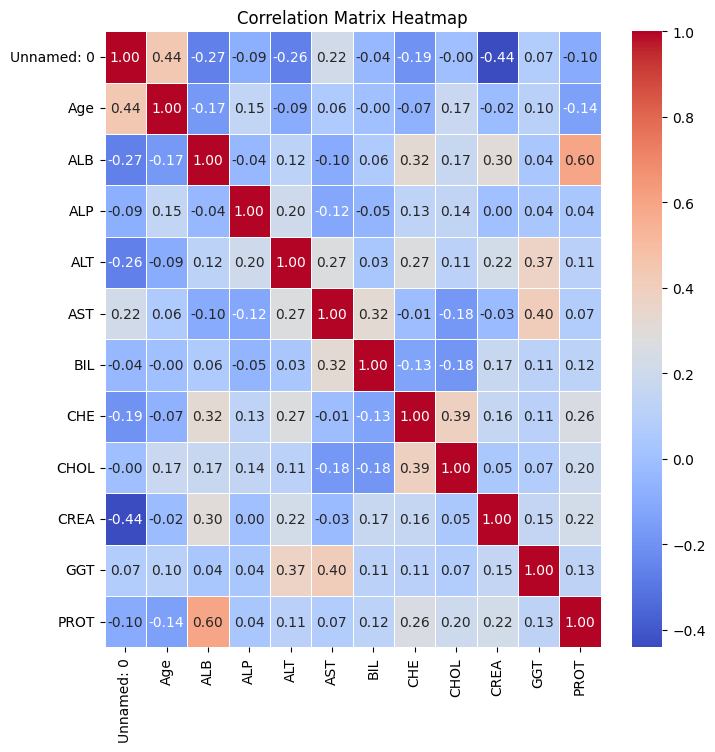

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
x =df['CREA'].values.reshape(-1,1)
y=df['PROT'].values.reshape(-1,1)


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['CREA'], df['PROT'])
plt.title('CREA VS PROT')
plt.xlabel(' CREA')
plt.ylabel('PROT')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size=0.2,random_state=2)
model = LinearRegression()
model.fit(xtrain,ytrain)

ypred = model.predict(xtest)

Text(0, 0.5, 'y values')

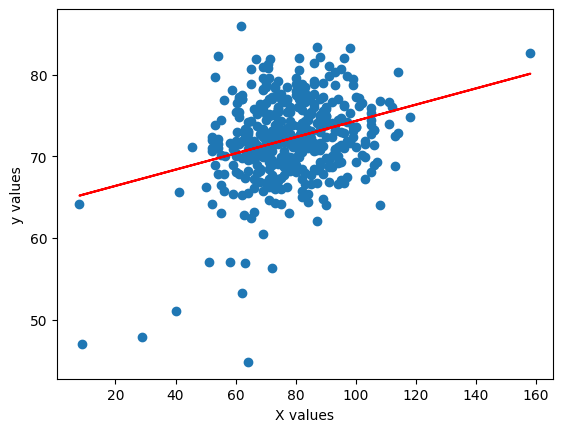

In [ ]:
plt.plot(xtrain, model.predict(xtrain), color ='r')
plt.scatter(xtrain,ytrain)
plt.xlabel('X values')
plt.ylabel('y values')

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
numerical_columns = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
X = df[numerical_columns]
X_with_constant = pd.concat([pd.Series(1, index=X.index, name='const'), X], axis=1)``
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]
print(vif_data)


   Variable         VIF
0     const  265.390875
1       Age    1.181691
2       ALB    1.799397
3       ALP    1.154801
4       ALT    1.439323
5       AST    1.574088
6       BIL    1.218722
7       CHE    1.387455
8      CHOL    1.372577
9      CREA    1.219222
10      GGT    1.369261
11     PROT    1.707228


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
mae = mean_absolute_error(ytest, ypred)
print(f'R-squared (R2): {r2:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')


R-squared (R2): -0.1632
Mean Squared Error (MSE): 27.6301
Mean Absolute Error (MAE): 4.0323


Since all the VIF values are below 5, you don't have a severe multicollinearity issue.

In [ ]:
predictors = ['ALB', 'CHE', 'CREA', 'CHOL', 'GGT']
target = 'PROT'
X = df[predictors]

Y = df[target]

In [ ]:
xtrain1,xtest1,ytrain1,ytest1 =train_test_split(X,Y,test_size=0.2,random_state=2)
model1 = LinearRegression()
model1.fit(xtrain1,ytrain1)
ypred1 = model1.predict(xtest1)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r3 = r2_score(ytest1, ypred1)
mse = mean_squared_error(ytest1, ypred1)
mae = mean_absolute_error(ytest1, ypred1)
print(f'R-squared (R2): {r3:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')


R-squared (R2): 0.2528
Mean Squared Error (MSE): 17.7471
Mean Absolute Error (MAE): 3.2055


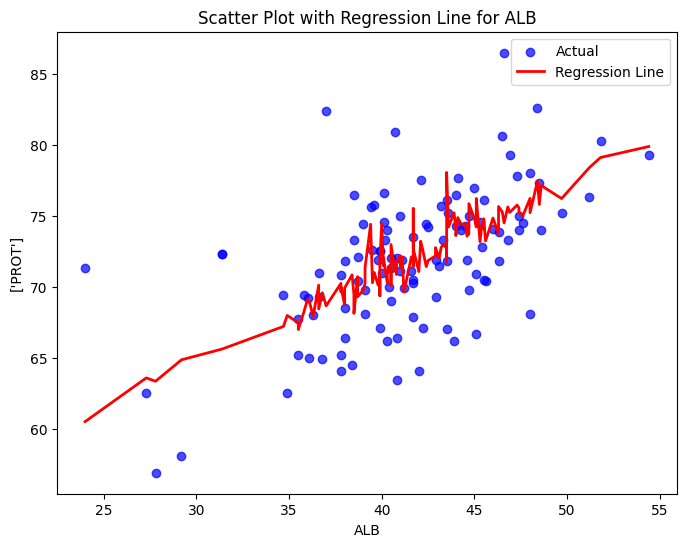

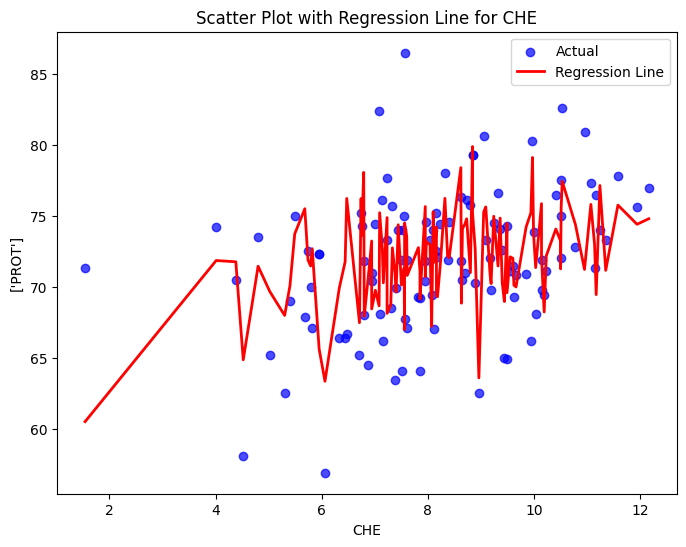

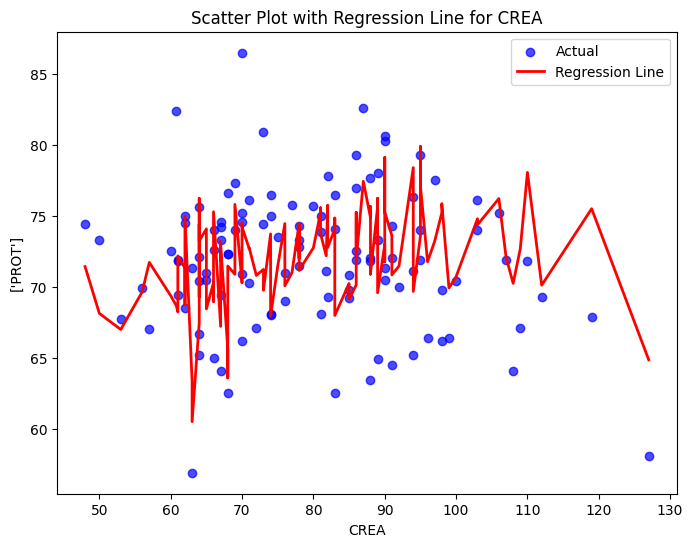

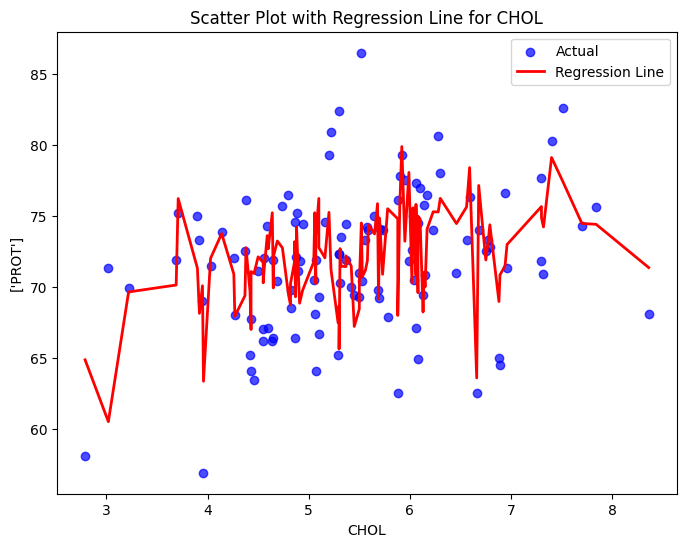

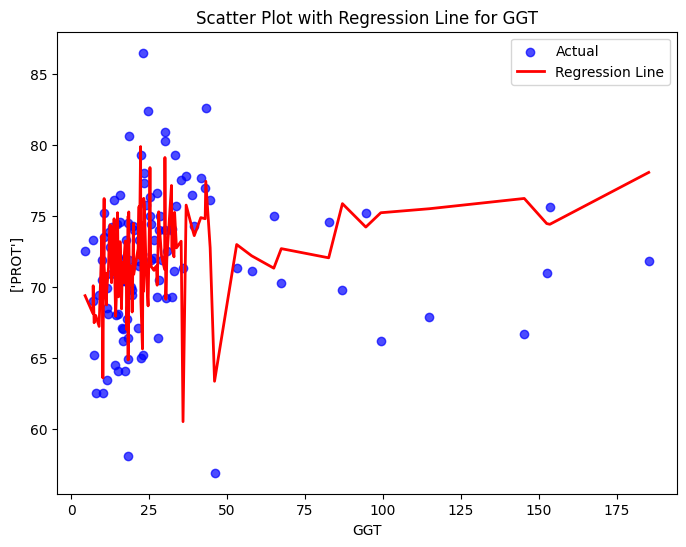

In [ ]:
predictors = [ 'ALB', 'CHE', 'CREA', 'CHOL', 'GGT']
target = ['PROT']
for predictor in predictors:
    plt.figure(figsize=(8, 6))

    plt.scatter(xtest1[predictor], ytest1, label='Actual', color='blue', alpha=0.7)

    sorted_indices = xtest1[predictor].argsort()
    plt.plot(xtest1[predictor].iloc[sorted_indices], ypred1[sorted_indices], color='red', linewidth=2, label='Regression Line')

    plt.xlabel(predictor)
    plt.ylabel(target)
    plt.legend()
    plt.title(f'Scatter Plot with Regression Line for {predictor}')

plt.show()

In [ ]:
x =df['GGT'].values.reshape(-1,1)
y=df['PROT'].values.reshape(-1,1)

from sklearn.preprocessing import PolynomialFeatures
xtrain3,xtest3,ytrain3,ytest3 =train_test_split(x,y,test_size=0.20,random_state=2)
p = PolynomialFeatures(degree = 2, include_bias = True)
xtrainp3 = p.fit_transform(xtrain3)
xtestp3 =p.transform(xtest3)
model3 = LinearRegression()
model3.fit(xtrainp3,ytrain3)
ypred3 = model3.predict(xtestp3)

Text(0, 0.5, 'y values')

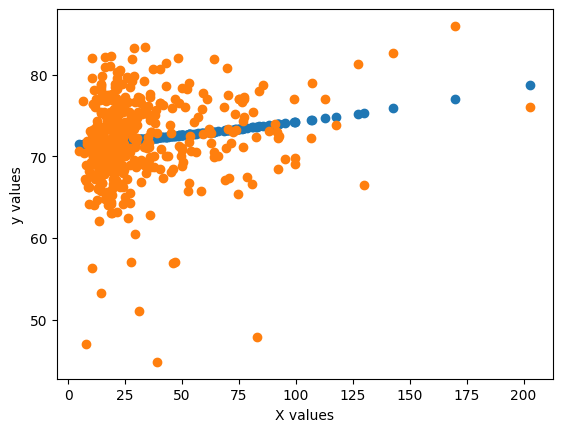

In [ ]:
plt.scatter(xtrain3,model3.predict(xtrainp3))
plt.scatter(xtrain3,ytrain3)
plt.xlabel('X values')
plt.ylabel('y values')

In [ ]:

r3 = r2_score(ytest3, ypred3)
mse = mean_squared_error(ytest3, ypred3)
mae = mean_absolute_error(ytest3, ypred3)
print(f'R-squared (R2): {r3:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')


R-squared (R2): -0.0365
Mean Squared Error (MSE): 24.6195
Mean Absolute Error (MAE): 3.8019


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
xtrain3,xtest3,ytrain3,ytest3 =train_test_split(x,y,test_size=0.20,random_state=2)
p = PolynomialFeatures(degree = 3, include_bias = True)
xtrainp3 = p.fit_transform(xtrain3)
xtestp3 =p.transform(xtest3)
model3 = LinearRegression()
model3.fit(xtrainp3,ytrain3)
ypred3 = model3.predict(xtestp3)

Text(0, 0.5, 'y values')

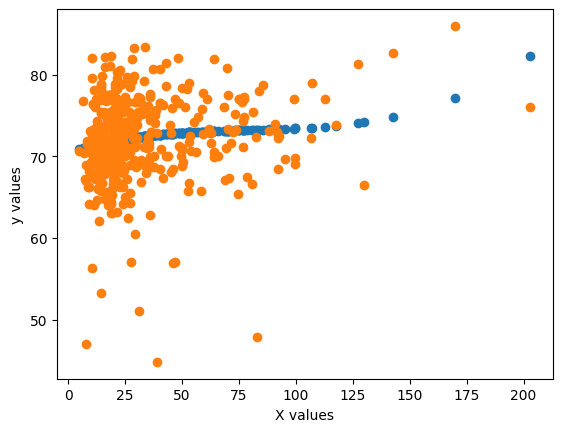

In [ ]:
plt.scatter(xtrain3,model3.predict(xtrainp3))
plt.scatter(xtrain3,ytrain3)
plt.xlabel('X values')
plt.ylabel('y values')

In [ ]:
r3 = r2_score(ytest3, ypred3)
mse = mean_squared_error(ytest3, ypred3)
mae = mean_absolute_error(ytest3, ypred3)
print(f'R-squared (R2): {r3:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

R-squared (R2): 0.0011
Mean Squared Error (MSE): 23.7255
Mean Absolute Error (MAE): 3.7380


Text(0, 0.5, 'y values')

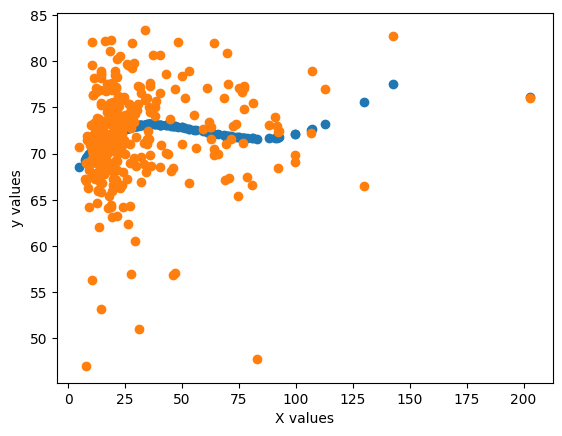

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
xtrain3,xtest3,ytrain3,ytest3 =train_test_split(x,y,test_size=0.44,random_state=2)
p = PolynomialFeatures(degree = 4, include_bias = True)
xtrainp3 = p.fit_transform(xtrain3)
xtestp3 =p.transform(xtest3)
model3 = LinearRegression()
model3.fit(xtrainp3,ytrain3)
ypred3 = model3.predict(xtestp3)

plt.scatter(xtrain3,model3.predict(xtrainp3))
plt.scatter(xtrain3,ytrain3)
plt.xlabel('X values')
plt.ylabel('y values')


In [ ]:
r3 = r2_score(ytest3, ypred3)
mse = mean_squared_error(ytest3, ypred3)
mae = mean_absolute_error(ytest3, ypred3)
print(f'R-squared (R2): {r3:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')


R-squared (R2): 0.0230
Mean Squared Error (MSE): 23.2148
Mean Absolute Error (MAE): 3.5972


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge=Ridge()

In [ ]:
parameters={'alpha':[0.001,0.01,1,5,10,20,30,35,40,45,50,55,100,150]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)



{'alpha': 150}
-25.646260786223174


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[0.001,0.01,1,5,10,20,30,35,40,45,50,55,100,150]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x,y)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 1, 5, 10, 20, 30, 35, 40, 45,
                                   50, 55, 100, 150]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)


{'alpha': 0.001}
-25.646282005877083


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=2)

In [ ]:
prediction_lasso=lasso_regressor.predict(x_test)
prediction_ridge=ridge_regressor.predict(x_test)


In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
ridge_coefficients = ridge_regressor.best_estimator_.coef_
ridge_intercept = ridge_regressor.best_estimator_.intercept_
print("\nRidge Coefficients:", ridge_coefficients)
print("Ridge Intercept:", ridge_intercept)

lasso_coefficients = lasso_regressor.best_estimator_.coef_
lasso_intercept = lasso_regressor.best_estimator_.intercept_
print("\nLasso Coefficients:", lasso_coefficients)
print("Lasso Intercept:", lasso_intercept)

ridge_cv_scores = cross_val_score(ridge_regressor.best_estimator_, x, y, cv=5, scoring='neg_mean_squared_error')
ridge_cv_rmse = np.sqrt(-ridge_cv_scores)

lasso_cv_scores = cross_val_score(lasso_regressor.best_estimator_, x, y, cv=5, scoring='neg_mean_squared_error')
lasso_cv_rmse = np.sqrt(-lasso_cv_scores)



Ridge Coefficients: [[0.02401828]]
Ridge Intercept: [71.34329397]

Lasso Coefficients: [0.02402596]
Lasso Intercept: [71.34305534]


In [ ]:
r3 = r2_score(ytest3, ypred3)
mse = mean_squared_error(ytest3, ypred3)
mae = mean_absolute_error(ytest3, ypred3)
print(f'R-squared (R2): {r3:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

R-squared (R2): 0.0230
Mean Squared Error (MSE): 23.2148
Mean Absolute Error (MAE): 3.5972


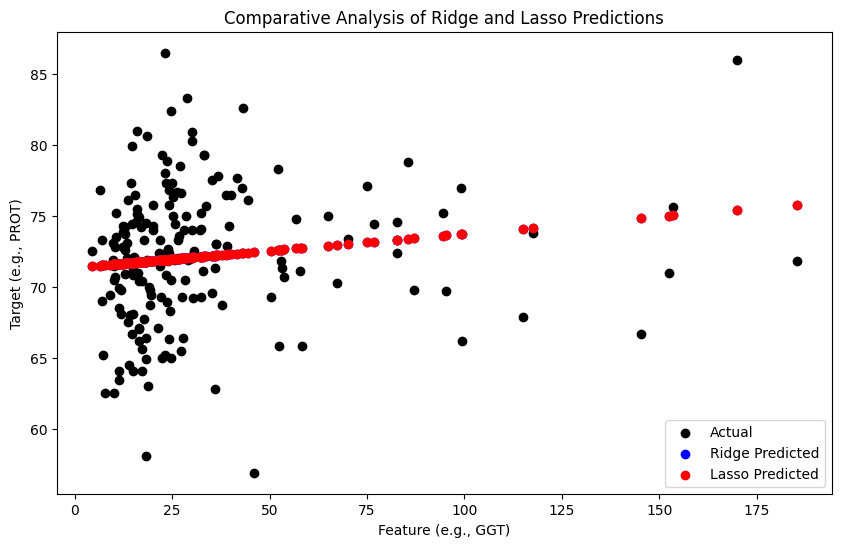

In [ ]:

plt.figure(figsize=(10, 6))

plt.scatter(x_test, y_test, color='black', label='Actual')
plt.scatter(x_test, prediction_ridge, color='blue', label='Ridge Predicted')
plt.scatter(x_test, prediction_lasso, color='red', label='Lasso Predicted')

plt.title('Comparative Analysis of Ridge and Lasso Predictions')
plt.xlabel('Feature (e.g., GGT)')
plt.ylabel('Target (e.g., PROT)')
plt.legend()
plt.show()
